In [41]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [117]:
def moving_average(a, n=3, zero_padding = False, const_padding = False):
    if zero_padding:
        if n%2 != 1:
            raise ValueError(f"n unequal not implemented for zero padding yet")
        ind = np.arange(n-1)
        a = np.insert(a, ind, np.zeros(n-1))
        a = np.roll(a, -int((n-1)/2))
    if const_padding:
        if n%2 != 1:
            ind1 = np.arange((n-1)/2).astype(int)
            ind2 = -np.arange(1,(n-1)/2).astype(int)
            a = np.insert(a, ind1, np.ones(int((n/2)))*a[0])
            a = np.insert(a, ind2, np.ones(int((n-1)/2))*a[-1])
        else:
            ind1 = np.arange((n-1)/2).astype(int)
            ind2 = -np.arange(1,(n+1)/2).astype(int)
            a = np.insert(a, ind1, np.ones(int((n-1)/2))*a[0])
            a = np.insert(a, ind2, np.ones(int((n-1)/2))*a[-1])
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [174]:
f1 = 0.1 *u.Hz #SASI frequency
#Modulation of higher/lower frequency, if f2>f1, moving average will filter out f2 contribution, otherwise f2 remains in signal
f2 = 0.2 *u.Hz 
samples = 1000 #number of samples in duration
duration = 100 #duration of signal in seconds
binning = int((1/f1*samples/duration).value) #binning needed to filter out singals with f>f1
t = np.linspace(0,duration,samples)*u.s
y = np.sin((f1*t).value*2*np.pi)+np.sin((f2*t).value*2*np.pi)*0.1
yn = y + np.random.randint(low=-1,high=1,size=len(y))*0.1
y2 = moving_average(yn, n=binning, const_padding=True)

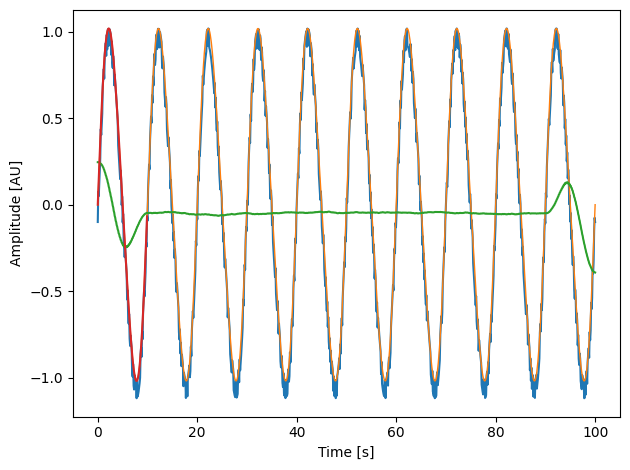

In [175]:
plt.plot(t,yn)
plt.plot(t,y,lw=1)

plt.plot(t,y2)
plt.plot(t[:binning],y[:binning])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [AU]')
plt.tight_layout()